In [1]:
#Himanshu Joshi
#Mel Collins
#Suraj Naik
#Srimoyee Saha
#Damodar Jadav


#Data Exploration and cleaning
import warnings 
import seaborn as sns
warnings.filterwarnings("ignore")
# Load the dataset
import pandas as pd
from matplotlib import pyplot as plt 
data = pd.read_csv('BestCard_data.csv', usecols=lambda column: column not in ['ID'])
data.drop_duplicates(inplace=True)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,1,university,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,50000,2,2,1,37,0,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,9000,689,679,0,university,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,1,3,1,39,0,0,0,0,0,...,3047,5000,1000,0,high school,0,1,0,0,0
26660,150000,1,3,2,43,-1,-1,-1,-1,0,...,129,0,0,0,high school,0,1,0,0,0
26661,30000,1,2,2,37,4,3,2,-1,0,...,4200,2000,3100,1,university,0,0,0,0,1
26662,80000,1,3,1,41,1,-1,0,0,0,...,1926,52964,1804,1,high school,0,1,0,0,0


In [2]:
# Set the target variable 'y'
y = data['default payment next month']

In [3]:
# Drop the target variable and duplicate variables
X = data.drop(['default payment next month', 'EDUCATION','EDUCATION_CAT'], axis=1)

In [4]:
X

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,graduate school,high school,none,others,university
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,2,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,220000,1,1,39,0,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,1,0,0,0
26660,150000,1,2,43,-1,-1,-1,-1,0,0,...,3526,8998,129,0,0,0,1,0,0,0
26661,30000,1,2,37,4,3,2,-1,0,0,...,0,22000,4200,2000,3100,0,0,0,0,1
26662,80000,1,1,41,1,-1,0,0,0,-1,...,3409,1178,1926,52964,1804,0,1,0,0,0


In [5]:
# Apply get_dummies to the DataFrame without the 'ID' column
X_dummies_no_id = pd.get_dummies(X, drop_first=True)

In [6]:
# Output to verify
print(X_dummies_no_id.shape)
print(X_dummies_no_id.columns.tolist())


(26635, 27)
['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'graduate school', 'high school', 'none', 'others', 'university']


In [7]:
print(X.isnull().sum())

LIMIT_BAL          0
SEX                0
MARRIAGE           0
AGE                0
PAY_1              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
graduate school    0
high school        0
none               0
others             0
university         0
dtype: int64


In [8]:
print(X.dtypes)

LIMIT_BAL          int64
SEX                int64
MARRIAGE           int64
AGE                int64
PAY_1              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
graduate school    int64
high school        int64
none               int64
others             int64
university         int64
dtype: object


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26635 entries, 0 to 26663
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        26635 non-null  int64
 1   SEX              26635 non-null  int64
 2   MARRIAGE         26635 non-null  int64
 3   AGE              26635 non-null  int64
 4   PAY_1            26635 non-null  int64
 5   PAY_2            26635 non-null  int64
 6   PAY_3            26635 non-null  int64
 7   PAY_4            26635 non-null  int64
 8   PAY_5            26635 non-null  int64
 9   PAY_6            26635 non-null  int64
 10  BILL_AMT1        26635 non-null  int64
 11  BILL_AMT2        26635 non-null  int64
 12  BILL_AMT3        26635 non-null  int64
 13  BILL_AMT4        26635 non-null  int64
 14  BILL_AMT5        26635 non-null  int64
 15  BILL_AMT6        26635 non-null  int64
 16  PAY_AMT1         26635 non-null  int64
 17  PAY_AMT2         26635 non-null  int64
 18  PAY_AMT3   

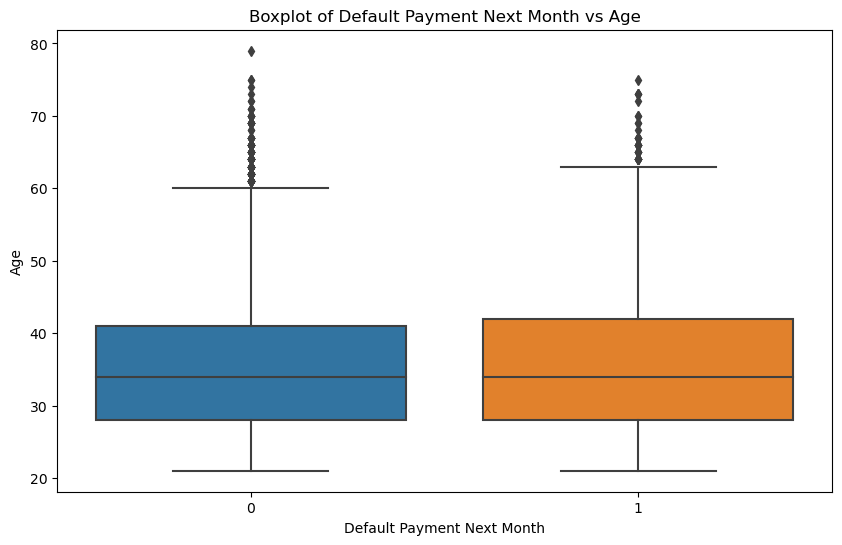

In [10]:
# Create a DataFrame containing the columns to compare
df = pd.concat([y, X['AGE']], axis=1)

# #box whisker to show the distribution of default payment across age
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='AGE', data=df)
plt.title('Boxplot of Default Payment Next Month vs Age')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.show()

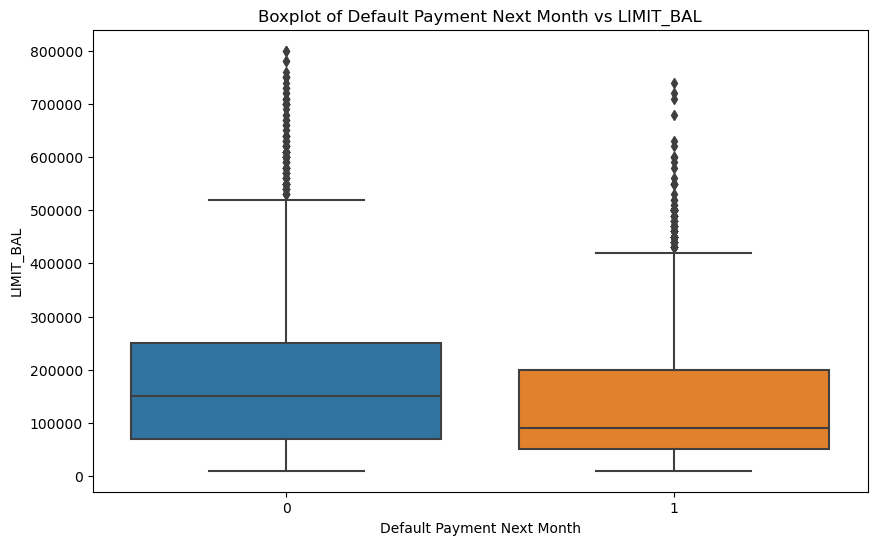

In [11]:
# Create a DataFrame with the required columns
df = pd.concat([y, X['LIMIT_BAL']], axis=1)

# box whisker to show the distribution of default payment across LIMIT_BAL
plt.figure(figsize=(10, 6))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Boxplot of Default Payment Next Month vs LIMIT_BAL')
plt.xlabel('Default Payment Next Month')
plt.ylabel('LIMIT_BAL')
plt.show()

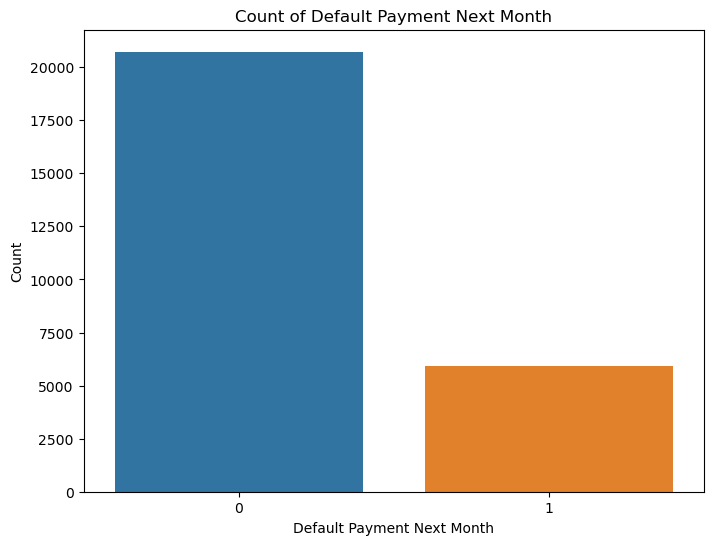

In [12]:
# Create a bargraph to show the number of defaults
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=data)
plt.title('Count of Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()

In [13]:
#the number of male/female customers
X['SEX'].value_counts()

SEX
2    16064
1    10571
Name: count, dtype: int64

In [14]:
#distribution customers' marital status
X['MARRIAGE'].value_counts()

MARRIAGE
2    14144
1    12157
3      334
Name: count, dtype: int64

In [15]:
#identifying the categorical features
categorical_features = ['SEX', 'MARRIAGE']

In [16]:
card_cat = X[categorical_features]
#Renaming for convinience
card_cat['Defaulter'] = data['default payment next month']

In [17]:
#Modifying terminology
card_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

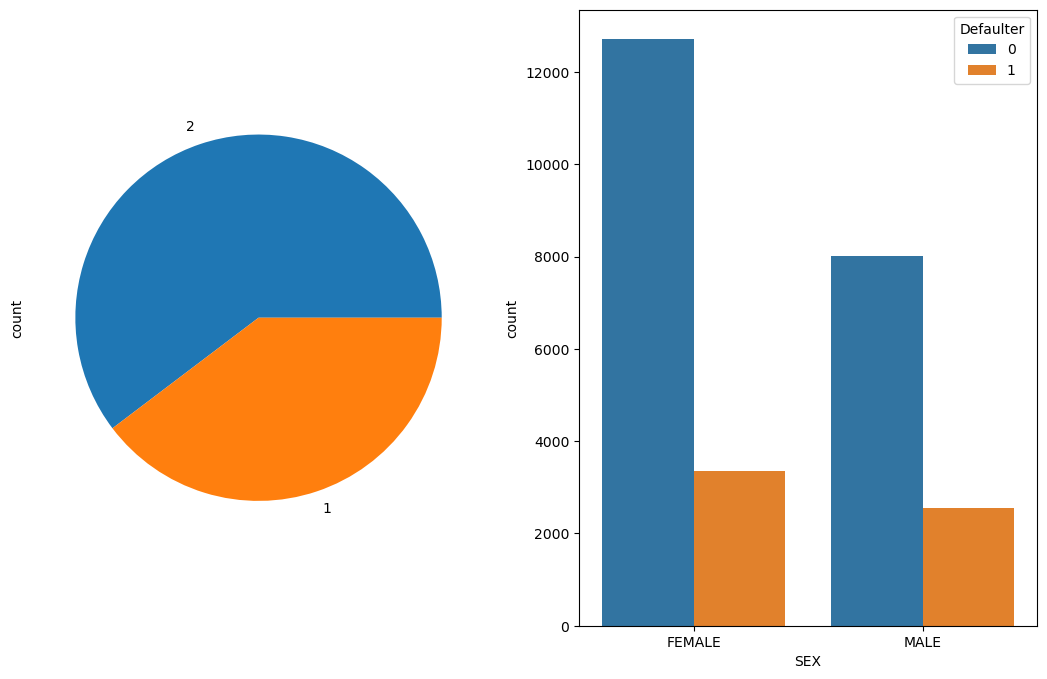

<Figure size 1000x500 with 0 Axes>

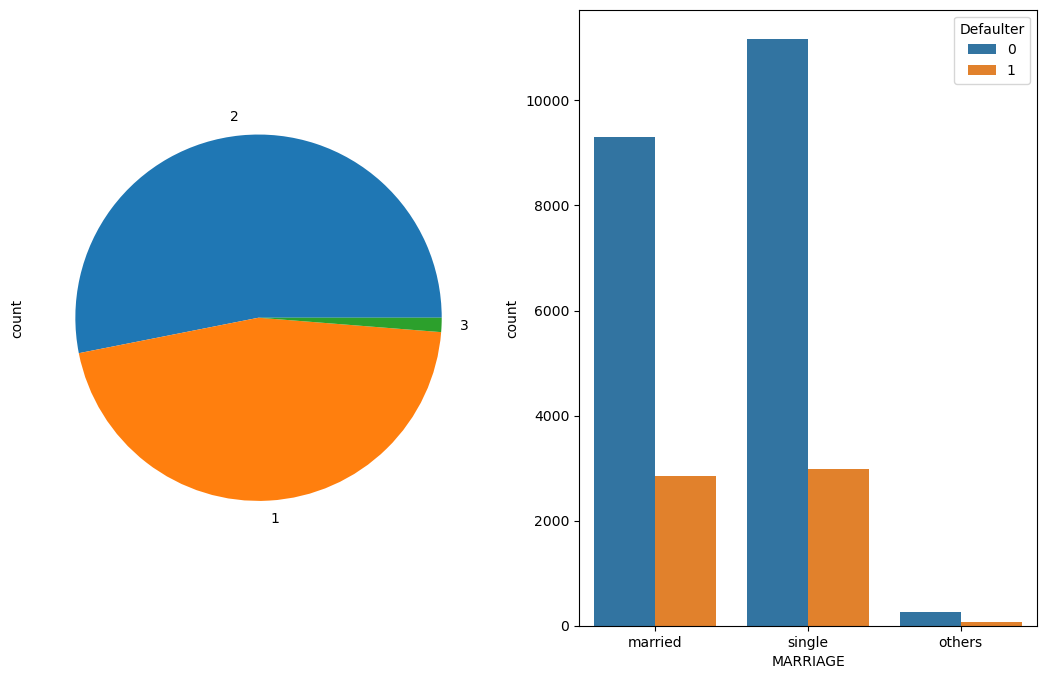

In [18]:
#Showing distribution defaults across gender and marital status
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  data[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = card_cat)

<Figure size 1000x500 with 0 Axes>

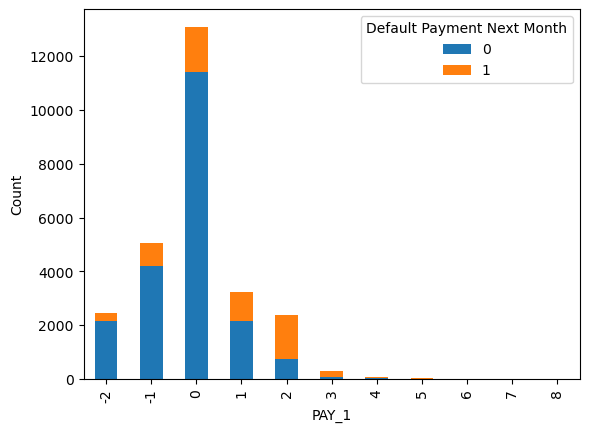

<Figure size 1000x500 with 0 Axes>

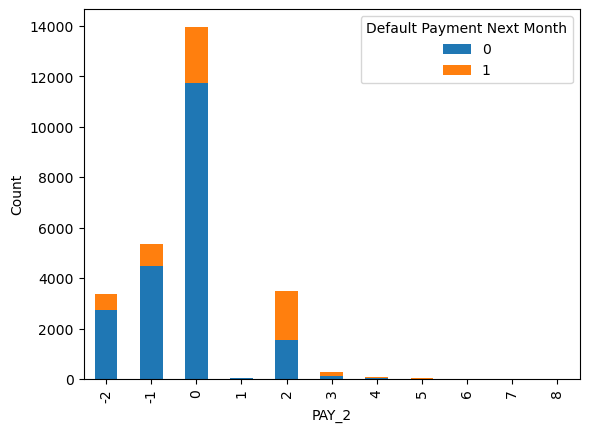

<Figure size 1000x500 with 0 Axes>

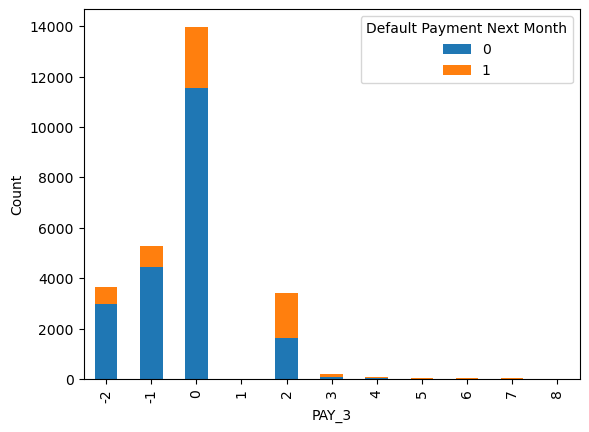

<Figure size 1000x500 with 0 Axes>

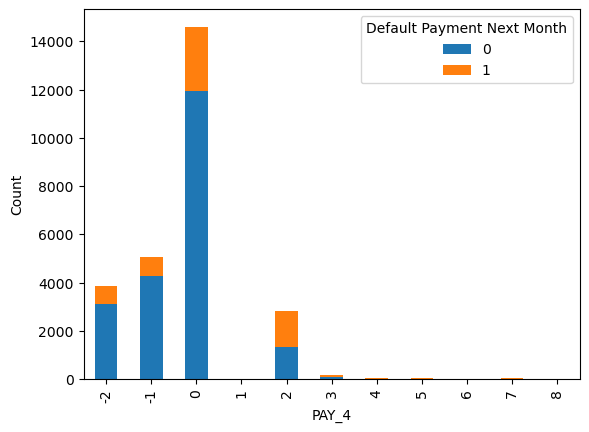

<Figure size 1000x500 with 0 Axes>

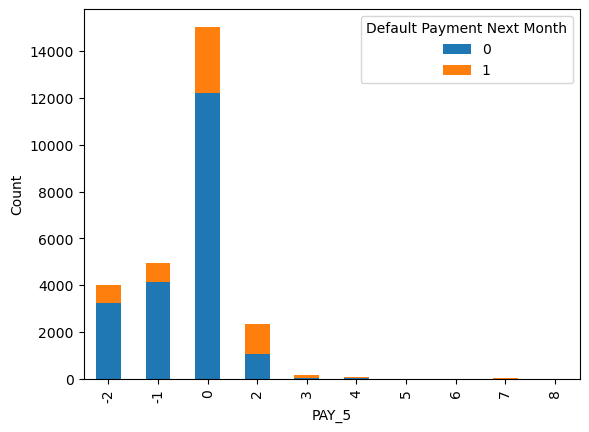

<Figure size 1000x500 with 0 Axes>

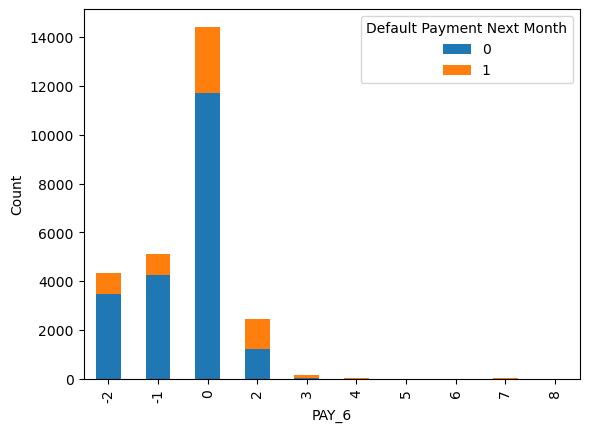

In [19]:
pay_col = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_col:
    plt.figure(figsize=(10, 5))
    data.groupby([col, 'default payment next month']).size().unstack().plot(kind='bar', stacked=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Default Payment Next Month')
    plt.show()

In [20]:
# Importing the LabelEncoder class from sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Instantiating the LabelEncoder object
labelencoder_data = LabelEncoder()

# Using the fit_transform method of the LabelEncoder object to encode the target variable
# 'data['default payment next month'].values' selects the values of the target variable from the DataFrame 'data'
# fit_transform() method fits the encoder to the target variable and transforms it into numerical labels
y = labelencoder_data.fit_transform(data['default payment next month'].values)

In [21]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
# Importing the train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: Features (independent variables)
# y: Target variable (dependent variable)
# test_size=0.20: Specifies that 20% of the data will be used for testing, while 80% will be used for training
# random_state=0: Setting the random_state ensures reproducibility of the results. 
#                 When the same random_state is used, the data will be split in the same way every time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [23]:
#Model Building

# Importing the DecisionTreeClassifier class from sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Instantiating the DecisionTreeClassifier model
# Setting random_state=0 for reproducibility of results
tree = DecisionTreeClassifier(random_state=0)

# Fitting the DecisionTreeClassifier model to the training data
# X_train: Features of the training set
# y_train: Target variable of the training set
tree.fit(X_train, y_train)

# Making predictions on the testing set using the trained model
y_pred = tree.predict(X_test)

In [24]:
# Calculating the accuracy of the model on the training set and printing it
print("Accuracy on training of DecisionTreeClassifier set: {:.3f}".format(tree.score(X_train, y_train)))

# Calculating the accuracy of the model on the testing set using the accuracy_score function and printing it
print("Accuracy on test of DecisionTreeClassifier set: {:.3f}".format(accuracy_score(y_pred, y_test)))




Accuracy on training of DecisionTreeClassifier set: 1.000
Accuracy on test of DecisionTreeClassifier set: 0.727


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Precision for DecisionTreeClassifier : {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall for DecisionTreeClassifier : {:.3f}".format(recall_score(y_test, y_pred)))

Precision for DecisionTreeClassifier : 0.394
Recall for DecisionTreeClassifier : 0.442


In [28]:
# Instantiating the DecisionTreeClassifier model
# Setting random_state=0 for reproducibility of results
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

# Fitting the DecisionTreeClassifier model to the training data
# X_train: Features of the training set
# y_train: Target variable of the training set
tree.fit(X_train, y_train)

# Making predictions on the testing set using the trained model
y_pred = tree.predict(X_test)

# Accuracy scores
training_accuracy_DTC = tree.score(X_train, y_train)
testing_accuracy_DTC = accuracy_score(y_pred, y_test)

# Calculating the accuracy of the model on the training set and printing it
print("Accuracy on training of DecisionTreeClassifier set: {:.3f}".format(tree.score(X_train, y_train)))

# Calculating the accuracy of the model on the testing set using the accuracy_score function and printing it
print("Accuracy on test of DecisionTreeClassifier set: {:.3f}".format(accuracy_score(y_pred, y_test)))


Accuracy on training of DecisionTreeClassifier set: 0.822
Accuracy on test of DecisionTreeClassifier set: 0.826


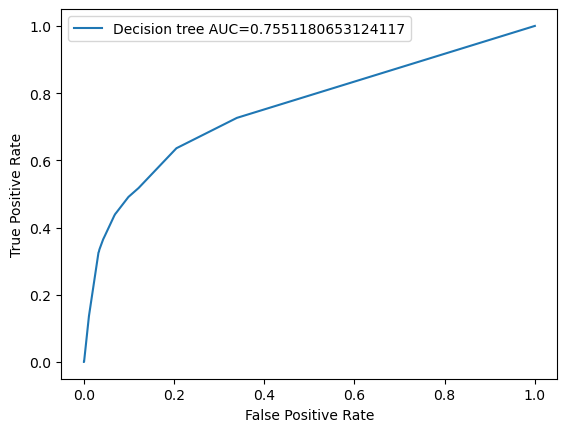

In [29]:
# Importing necessary libraries
from sklearn import metrics  # Importing metrics module from scikit-learn library

# Making predictions on the testing set using the trained Decision Tree Classifier model
y_pred_proba = tree.predict_proba(X_test)[:,1]  # Predicting probabilities of positive class (class 1)

# Calculating the True Positive Rate (Sensitivity) and False Positive Rate for different threshold values
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)  # Computing ROC curve

# Calculating the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)  # Computing AUC score

# Plotting the ROC curve
plt.plot(fpr, tpr, label="Decision tree AUC=" + str(auc))  # Plotting False Positive Rate vs. True Positive Rate
plt.xlabel('False Positive Rate')  # Adding label to x-axis
plt.ylabel('True Positive Rate')   # Adding label to y-axis

# Showing the legend
plt.legend()  # Displaying legend on the plot

# Displaying the plot
plt.show()  # Showing the ROC curve plot with AUC value


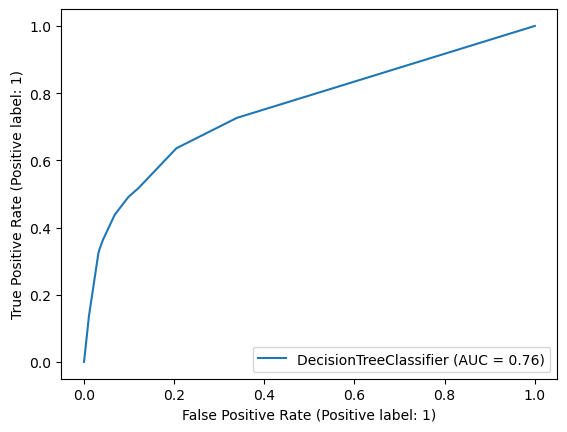

In [30]:
# Importing RocCurveDisplay class from sklearn.metrics module
from sklearn.metrics import RocCurveDisplay

# Creating a ROC curve display from the trained Decision Tree Classifier model and the testing data
# tree: Trained Decision Tree Classifier model
# X_test: Features of the testing set
# y_test: True labels of the testing set
RocCurveDisplay.from_estimator(tree, X_test, y_test)


In [31]:
# Importing the RandomForestClassifier class from sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Defining and training the random forest classifier with optimized parameters
# n_estimators: Number of trees in the forest (100 in this case)
# max_depth: Maximum depth of each tree in the forest (10 in this case)
# random_state: Seed for random number generation to ensure reproducibility of results
# n_jobs: Number of jobs to run in parallel for both fit and predict (-1 indicates using all available CPU cores)
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)  # Training the random forest classifier using the training data

# Making predictions on the testing set using the trained random forest model
y_rf_pred = forest.predict(X_test)

# Evaluating the performance of the random forest model using accuracy score

# Printing the training accuracy
print("Random Forest Accuracy of RandomForestClassifier on training set: {:.3f}".format(forest.score(X_train, y_train)))
# Comparing predicted labels (y_rf_pred) with true labels (y_test) and calculating the accuracy
print("Random Forest Accuracy of RandomForestClassifier on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))


# Accuracy scores
training_accuracy_RFC = forest.score(X_train, y_train)
testing_accuracy_RFC = accuracy_score(y_test, y_rf_pred)


Random Forest Accuracy of RandomForestClassifier on training set: 0.858
Random Forest Accuracy of RandomForestClassifier on test set: 0.830


In [32]:
print("Precision for RandomForestClassifier : {:.3f}".format(precision_score(y_test, y_rf_pred)))
print("Recall for RandomForestClassifier : {:.3f}".format(recall_score(y_test, y_rf_pred)))

Precision for RandomForestClassifier : 0.711
Recall for RandomForestClassifier : 0.386


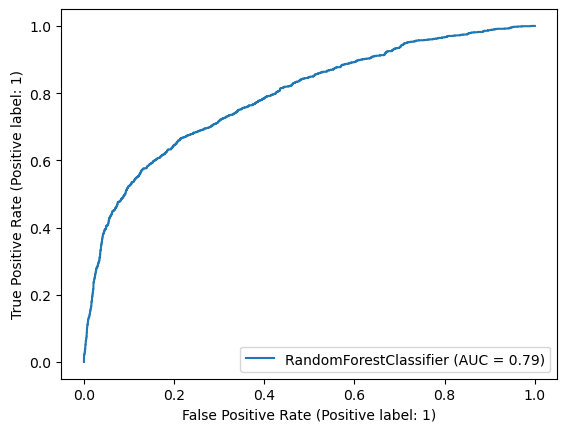

In [33]:
# Importing RocCurveDisplay class from sklearn.metrics module
from sklearn.metrics import RocCurveDisplay

# Creating a ROC curve display from the trained Random Forest Classifier model and the testing data
# forest: Trained Random Forest Classifier model
# X_test: Features of the testing set
# y_test: True labels of the testing set
RocCurveDisplay.from_estimator(forest, X_test, y_test)


            feature  importance
4             PAY_1    0.238321
5             PAY_2    0.127564
6             PAY_3    0.051982
7             PAY_4    0.050025
8             PAY_5    0.042166
16         PAY_AMT1    0.041153
0         LIMIT_BAL    0.040491
10        BILL_AMT1    0.036536
11        BILL_AMT2    0.034028
18         PAY_AMT3    0.032974
17         PAY_AMT2    0.031358
12        BILL_AMT3    0.030316
3               AGE    0.028535
14        BILL_AMT5    0.028375
9             PAY_6    0.028314
15        BILL_AMT6    0.028186
13        BILL_AMT4    0.028156
21         PAY_AMT6    0.027983
20         PAY_AMT5    0.026554
19         PAY_AMT4    0.025695
2          MARRIAGE    0.005121
1               SEX    0.004289
22  graduate school    0.003906
26       university    0.003583
23      high school    0.003393
24             none    0.000870
25           others    0.000127


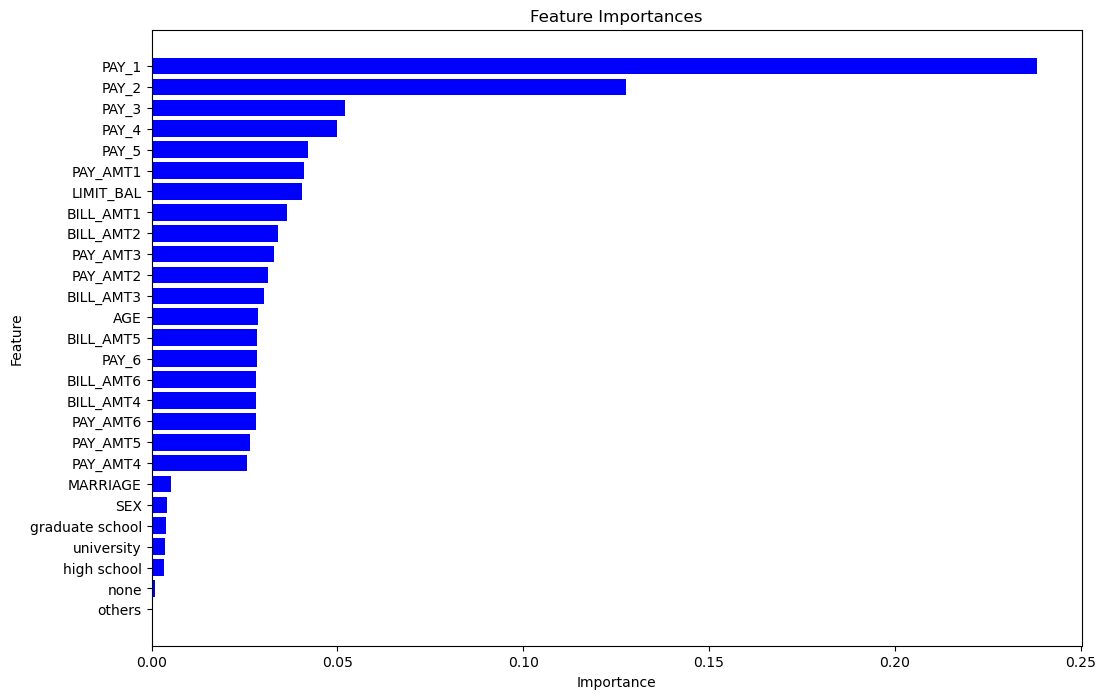

In [34]:
# Calculating feature importances from the trained Random Forest Classifier model
importances = forest.feature_importances_

# Creating a DataFrame to store feature names and their corresponding importances
# X_train.columns: Names of the features used in training the model
# importances: Feature importances calculated by the Random Forest Classifier
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sorting the DataFrame by feature importance in descending order
df = df.sort_values('importance', ascending=False)

# Mapping feature names and importances into a new variable
Feature_importance = dict(zip(df['feature'], df['importance']))

# Printing the DataFrame to display feature names and their importances
print(df)

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(df['feature'], df['importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [35]:
# Instantiating a DecisionTreeClassifier object with a specified random_state
tree = DecisionTreeClassifier(random_state=0)

# Retrieving the parameters of the DecisionTreeClassifier instance
tree.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.9081275 ,  0.81616133,  0.85324058, ..., -0.10330588,
        -0.06476383, -0.93490883],
       [ 0.47867973,  0.81616133, -1.07025184, ..., -0.10330588,
        -0.06476383,  1.06962301],
       [-0.29176873, -1.22524795,  0.85324058, ..., -0.10330588,
        -0.06476383, -0.93490883],
       ...,
       [-0.75403781, -1.22524795,  0.85324058, ..., -0.10330588,
        -0.06476383,  1.06962301],
       [-0.13767904, -1.22524795, -1.07025184, ..., -0.10330588,
        -0.06476383, -0.93490883],
       [ 1.71139728, -1.22524795,  0.85324058, ...,  9.67999082,
        -0.06476383, -0.93490883]])

In [38]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 200)
# fit the model with data
logreg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=200)

In [39]:
#Creating coefficients
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef

,Coefficients
LIMIT_BAL,-0.085355
SEX,-0.050832
MARRIAGE,-0.067517
AGE,0.059628
PAY_1,0.624758
PAY_2,0.094549
PAY_3,0.104525
PAY_4,0.058703
PAY_5,0.025549
PAY_6,0.010505


In [40]:
#Creating the odds
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_)[0], index = X_train.columns,columns = ['Odds'])
df.sort_values(by=['Odds'], ascending = True)

,Odds
BILL_AMT1,0.725690
PAY_AMT1,0.792443
PAY_AMT2,0.810992
BILL_AMT4,0.858460
none,0.912620
LIMIT_BAL,0.918187
PAY_AMT4,0.932729
MARRIAGE,0.934712
PAY_AMT6,0.936433
others,0.947513


In [41]:
y_pred_lr=logreg.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
#Printing accuracy, recall,precision
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy on training set for logistic regression: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
training_accuracy_LR=logreg.score(X_train_scaled, y_train)

print("Accuracy on test set for logistic regression::{:.3f}".format(metrics.accuracy_score(y_pred_lr, y_test)))
testing_accuracy_LR=metrics.accuracy_score(y_pred_lr, y_test)
print("Precision for logistic regression: {:.3f}".format(precision_score(y_test, y_pred_lr)))
print("Recall for logistic regression: {:.3f}".format(recall_score(y_test, y_pred_lr)))

Accuracy on training set for logistic regression: 0.809
Accuracy on test set for logistic regression::0.814
Precision for logistic regression: 0.746
Recall for logistic regression: 0.238


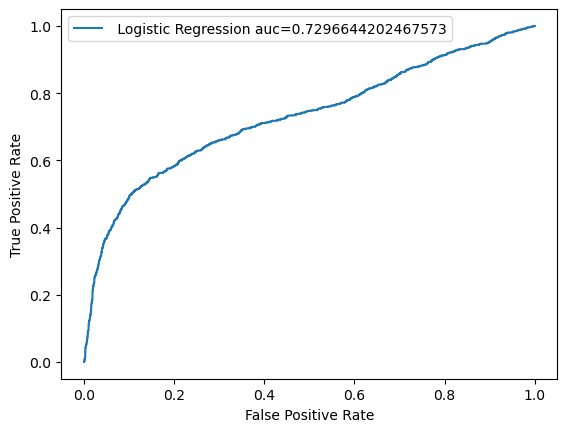

In [51]:
#Plotting AUC curve
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#plt.legend(loc=4)
pyplot.legend()
pyplot.show()

Accuracy on training set (AdaBoost): 0.819
Accuracy on test set (AdaBoost): 0.825


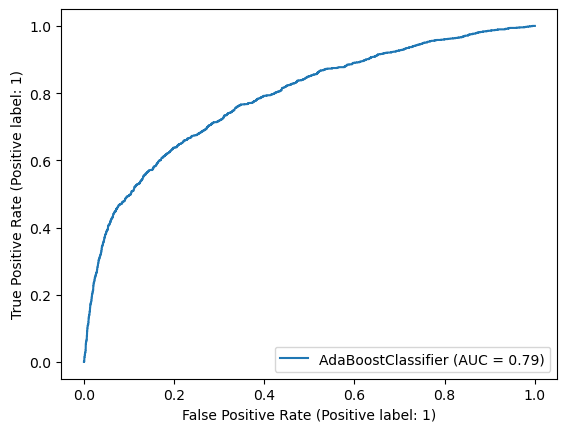

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Instantiate and train the AdaBoost classifier
boost = AdaBoostClassifier(n_estimators=100, random_state=0)
boost.fit(X_train, y_train)

# Predictions on the test set
y_boost_pred = boost.predict(X_test)

# Calculate and print accuracy on the training set
training_accuracy_bc = boost.score(X_train, y_train)
print("Accuracy on training set (AdaBoost): {:.3f}".format(training_accuracy_bc))

# Calculate and print accuracy on the test set
testing_accuracy_bc = accuracy_score(y_boost_pred, y_test)
print("Accuracy on test set (AdaBoost): {:.3f}".format(testing_accuracy_bc))

# Plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(boost, X_test, y_test)


In [45]:
print("Precision for AdaBoostClassifier : {:.3f}".format(precision_score(y_test, y_boost_pred)))
print("Recall for AdaBoostClassifier: {:.3f}".format(recall_score(y_test, y_boost_pred)))

Precision for AdaBoostClassifier : 0.699
Recall for AdaBoostClassifier: 0.360


In [47]:
# PLEASE RUN THE BELOW TWO SECTIONS OF CODE IN TENSOR FLOW ENVIRONMENT, AS IT REQUIRES THE SAID MODULES
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score, precision_score, recall_score
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.callbacks import EarlyStopping


In [48]:
#from sklearn.metrics import precision_score, recall_score, accuracy_score
#from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.callbacks import EarlyStopping

# Scale the data
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Define the model architecture
#model = Sequential([
#    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#    Dropout(0.5),
#    Dense(32, activation='relu'),
#    Dropout(0.5),
#    Dense(1, activation='sigmoid')
#])

# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Extract training accuracy
#training_accuracy_NN = history.history['accuracy'][-1]

# Make predictions on the test set
#y_pred_proba = model.predict(X_test_scaled)
#y_pred_NN = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
#testing_accuracy_NN = accuracy_score(y_test, y_pred_NN)
#precision = precision_score(y_test, y_pred_NN)
#recall = recall_score(y_test, y_pred_NN)

# Print the results
#print("Model Evaluation for Neural Network:")
#print("Training Accuracy for Neural Network:", training_accuracy_NN)
#print("Testing Accuracy for Neural Network:", testing_accuracy_NN)
#print("Precision for Neural Network:", precision)
#print("Recall for Neural Network:", recall)


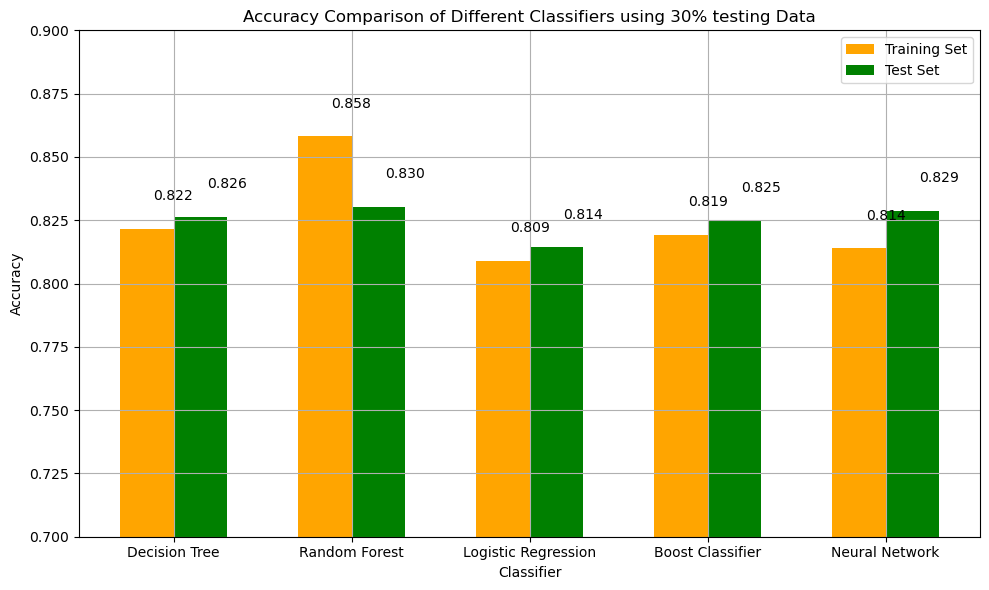

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['Decision Tree', 'Random Forest', 'Logistic Regression','Boost Classifier', 'Neural Network']
# hardcoded the training and testing accuracy we got from tensorflow for comparisions
training_accuracy_NN=0.814
testing_accuracy_NN=0.8288
# Accuracy scores for training and testing sets
training_accuracies = [training_accuracy_DTC, training_accuracy_RFC, training_accuracy_LR,training_accuracy_bc, training_accuracy_NN]  
testing_accuracies = [testing_accuracy_DTC, testing_accuracy_RFC, testing_accuracy_LR,testing_accuracy_bc, testing_accuracy_NN]   

# Define the number of classifiers and the width of each bar
num_classifiers = len(classifiers)
bar_width = 0.3

# Set the positions of the bars on the x-axis
index = np.arange(num_classifiers)

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(index, training_accuracies, bar_width, label='Training Set', color='Orange')
plt.bar(index + bar_width, testing_accuracies, bar_width, label='Test Set', color='Green')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers using 30% testing Data')
plt.xticks(index + bar_width / 2, classifiers)
plt.legend()
plt.grid(True)
plt.ylim(0.7, 0.9)  # Adjust the y-axis limit for better visualization

# Add labels on top of the bars
for i in range(num_classifiers):
    plt.text(index[i] + bar_width / 2, training_accuracies[i] + 0.01, f'{training_accuracies[i]:.3f}', ha='center', va='bottom', color='black')
    plt.text(index[i] + 3 * bar_width / 2, testing_accuracies[i] + 0.01, f'{testing_accuracies[i]:.3f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()




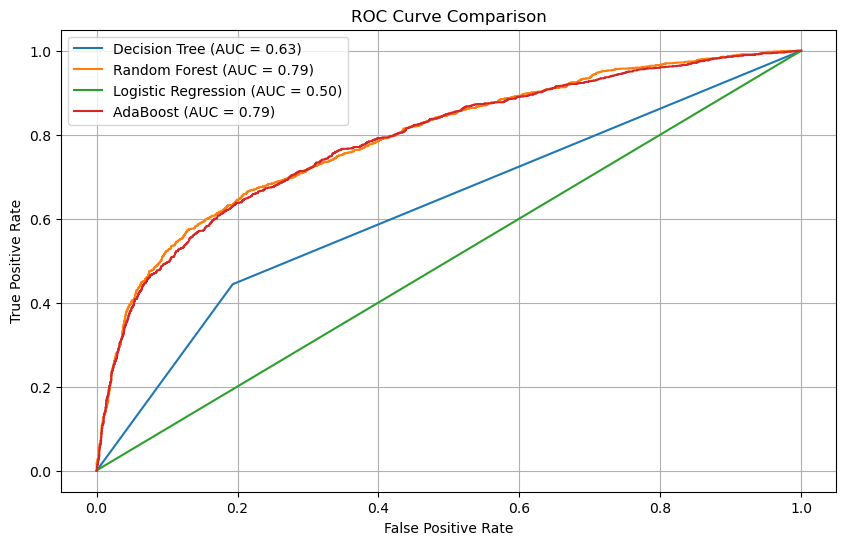

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the DecisionTreeClassifier model to the training data
tree.fit(X_train, y_train)

# Calculate ROC curve data for the Decision Tree classifier
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Calculate ROC curve data for the RandomForestClassifier
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Calculate ROC curve data for the Logistic Regression classifier
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Calculate ROC curve data for the AdaBoostClassifier
fpr_boost, tpr_boost, _ = roc_curve(y_test, boost.predict_proba(X_test)[:,1])
roc_auc_boost = auc(fpr_boost, tpr_boost)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {roc_auc_forest:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_boost, tpr_boost, label=f'AdaBoost (AUC = {roc_auc_boost:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


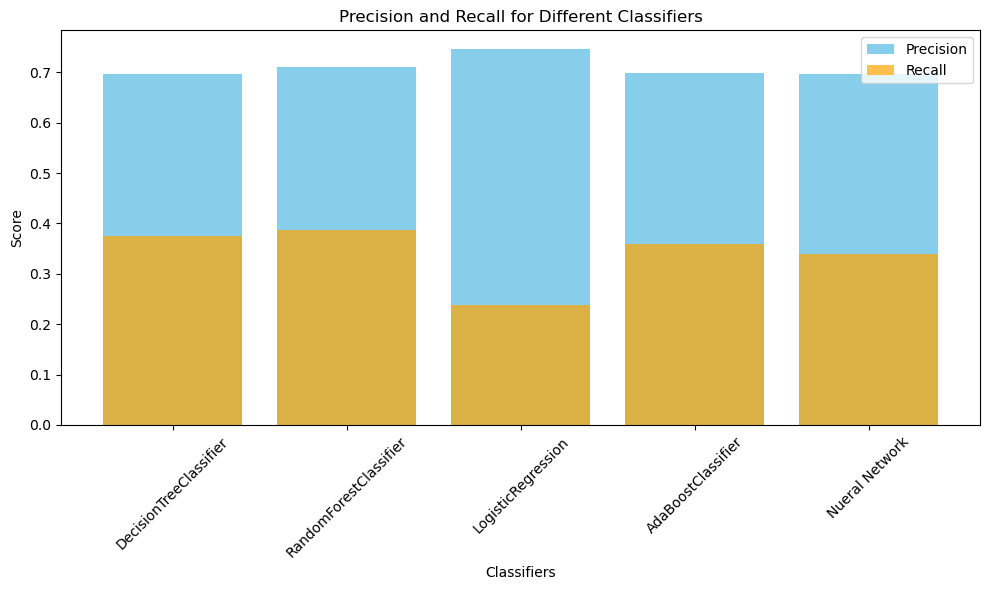

In [55]:
# Calculate precision and recall for DecisionTreeClassifier
precision_DTC = precision_score(y_test, y_pred)
recall_DTC = recall_score(y_test, y_pred)

# Calculate precision and recall for RandomForestClassifier
precision_RFC = precision_score(y_test, y_rf_pred)
recall_RFC = recall_score(y_test, y_rf_pred)

# Calculate precision and recall for LogisticRegression
precision_LR = precision_score(y_test, y_pred_lr)
recall_LR = recall_score(y_test, y_pred_lr)

# Calculate precision and recall for AdaBoostClassifier
precision_bc = precision_score(y_test, y_boost_pred)
recall_bc = recall_score(y_test, y_boost_pred)

# Hard coded  precision and recall for Nueral Network we got from tensor flow  
precision_NN = 0.696
recall_NN = 0.339

# Define classifiers' names
classifiers = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'AdaBoostClassifier', 'Nueral Network']

# Define precision and recall values
precisions = [precision_DTC, precision_RFC, precision_LR, precision_bc, precision_NN]
recalls = [recall_DTC, recall_RFC, recall_LR, recall_bc,recall_NN]

# Plotting precision and recall
plt.figure(figsize=(10, 6))

# Plot precision
plt.bar(classifiers, precisions, color='skyblue', label='Precision')

# Plot recall
plt.bar(classifiers, recalls, color='orange', label='Recall', alpha=0.7)

# Add labels and legend
plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Precision and Recall for Different Classifiers')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Happy Ending 